In [52]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

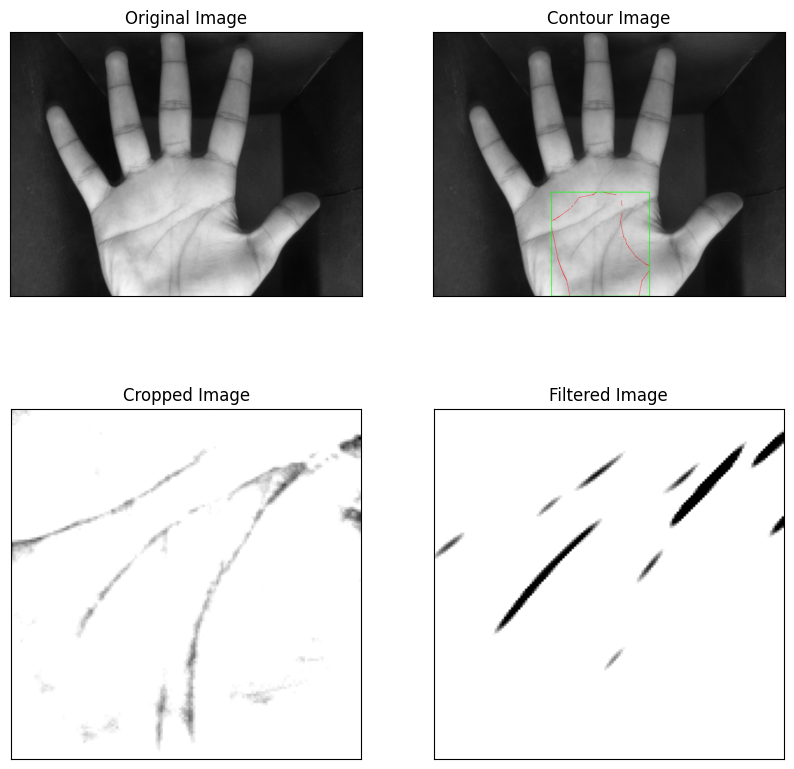

In [298]:
img_original = cv2.imread('../../IITD Palmprint V1/Left Hand/011_4.JPG', cv2.IMREAD_GRAYSCALE)

img = img_original.copy()
blur = cv2.GaussianBlur(img,(3,3),0)

# Thresholding the image
_, th = cv2.threshold(blur,50,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


# Applying Morphological operators for smoothing out the image
kernal = np.ones((5,5), dtype=np.uint8)
grad = cv2.morphologyEx(th, cv2.MORPH_OPEN, kernal, iterations=5)
ret, grad = cv2.threshold(grad, 0, 255, cv2.THRESH_TOZERO)



# APPLYING WATERSHED ALGORITHM
dist_transform = cv2.distanceTransform(grad, cv2.DIST_L2, 5)

ret, sure = cv2.threshold(dist_transform, 0.50*dist_transform.max(), 255, 0)

grad2 = cv2.morphologyEx(sure, cv2.MORPH_OPEN, kernal, iterations=3)

grad3 = cv2.dilate(grad2, kernal, iterations=3)

grad3 = np.uint8(grad3)

# ret, markers = cv2.connectedComponents(grad3)

contours, heirarchy = cv2.findContours(grad3, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

img_c = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)
img_cnt = cv2.drawContours(img_c, contours[0], -1, (255,0,0), 2)


# Finding the bounding rectangle
x,y,w,h = cv2.boundingRect(contours[0])
cv2.rectangle(img_c,(x,y),(x+w,y+h),(0,255,0),2)

# Saving the image
# cv2.imwrite('../ROI_extracted.jpg',img_c)

# Crop the image
img_cropped = img_original[y:y+h, x:x+w]
# img_cropped = cv2.cvtColor(img_cropped, cv2.COLOR_GRAY2BGR)

# make darker areas more darker
img_cropped = cv2.addWeighted(img_cropped, 4, cv2.GaussianBlur(img_cropped, (0,0), 30), -4, 300)
img_cropped = cv2.resize(img_cropped, (150,150))

# Construct the kernel
ksize = (55,55)
sigma = 5
theta = 1*np.pi/4
lambd = 10
gamma = 0.5
psi = 0

gabor = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
# plt.imshow(gabor, cmap='gray')

# Apply the kernel to the image
filtered_img = cv2.filter2D(img_cropped, cv2.CV_8SC3, gabor)

# Displaying the images
plt.figure(figsize=(10,10))
plt.subplot(2,2,1), plt.imshow(img_original, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow(img_c, cmap='gray')
plt.title('Contour Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow(img_cropped, cmap='gray')
plt.title('Cropped Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

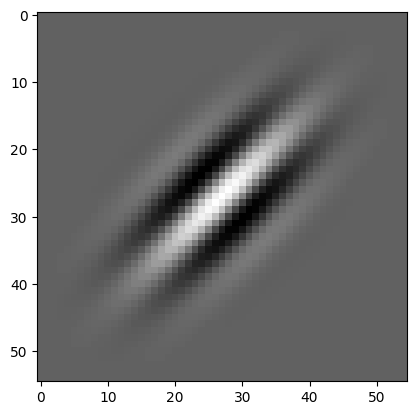

In [297]:
# Construct the kernel
ksize = (55,55)
sigma = 5
theta = 1*np.pi/4
lambd = 10
gamma = 0.5
psi = 0

gabor = cv2.getGaborKernel(ksize, sigma, theta, lambd, gamma, psi, ktype=cv2.CV_32F)
plt.imshow(gabor, cmap='gray')

# Apply the kernel to the image
filtered_img = cv2.filter2D(img_cropped, cv2.CV_8SC3, gabor)

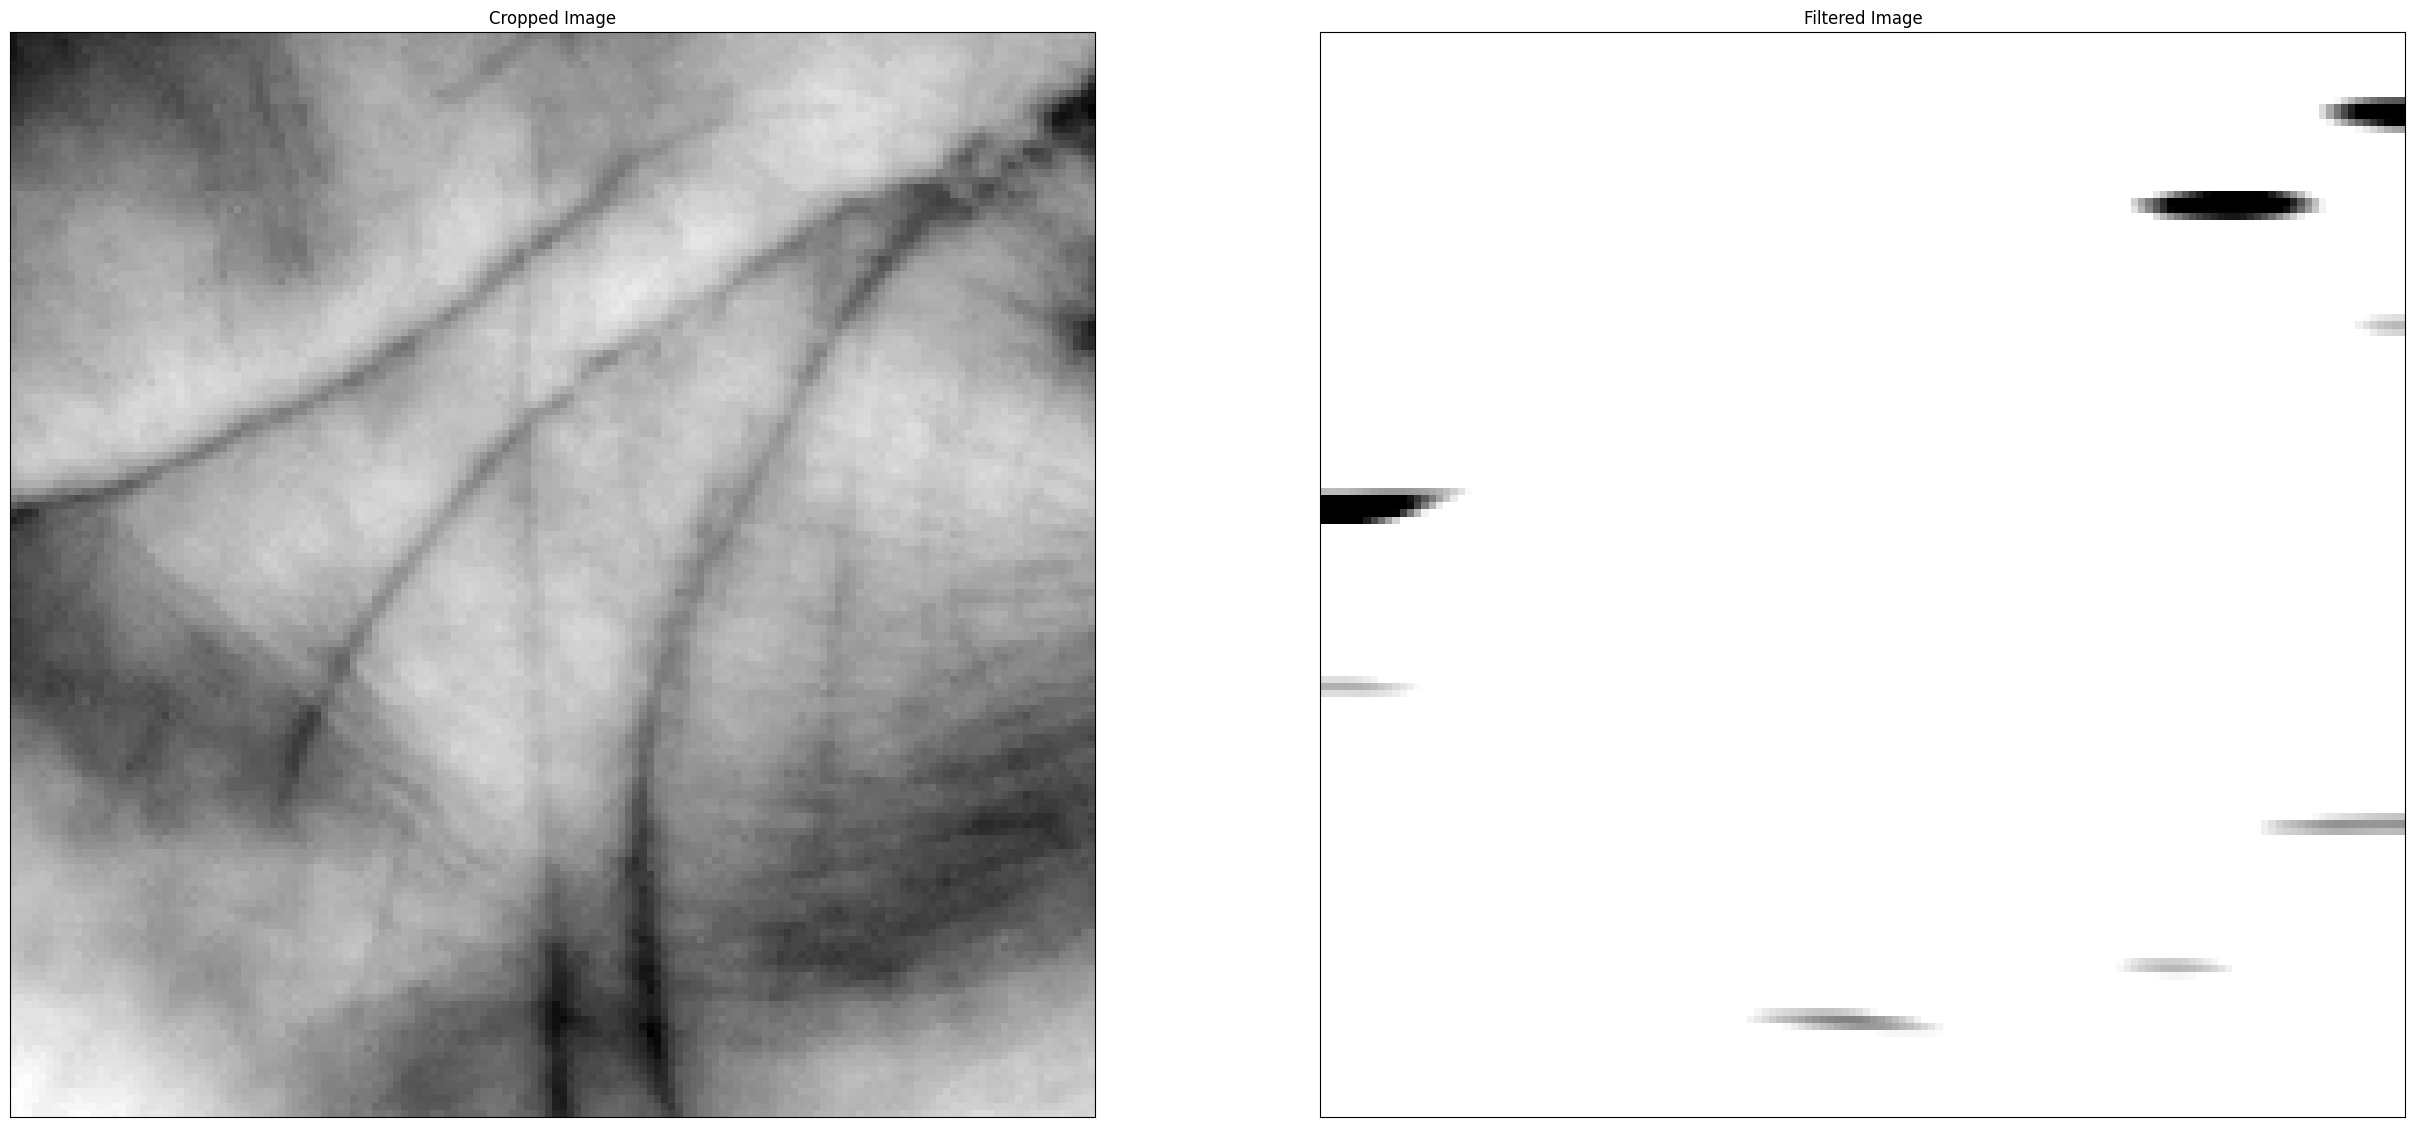

In [276]:
plt.figure(figsize=(31,31))
plt.subplot(2,2,3), plt.imshow(img_cropped, cmap='gray')
plt.title('Cropped Image'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow(filtered_img, cmap='gray')
plt.title('Filtered Image'), plt.xticks([]), plt.yticks([])
plt.show()

--------------

In [195]:
def show(img):
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])

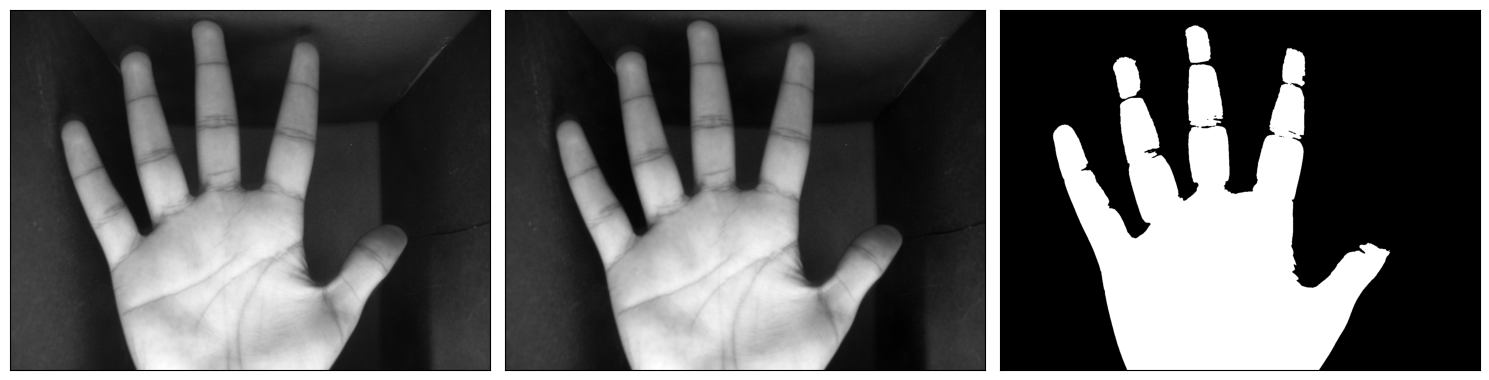

In [269]:
img_original = cv2.imread('../../IITD Palmprint V1/Left Hand/011_3.JPG', 0)
# img_original = img_cropped.copy()
# img_original = cv2.dilate(img_original, np.ones((3,3), np.uint8), iterations=5)
# kernal = np.ones((5,5), dtype=np.uint8)
# img_original = cv2.morphologyEx(img_original, cv2.MORPH_OPEN, kernal, iterations=5)
h, w = img_original.shape
# img = np.zeros((h+160,w), np.uint8)
img = img_original
plt.figure(figsize=(15,5))
plt.subplot(131)
show(img)
blur = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(132)
show(blur)
_, th = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.subplot(133)
show(th)
plt.tight_layout()
plt.show()

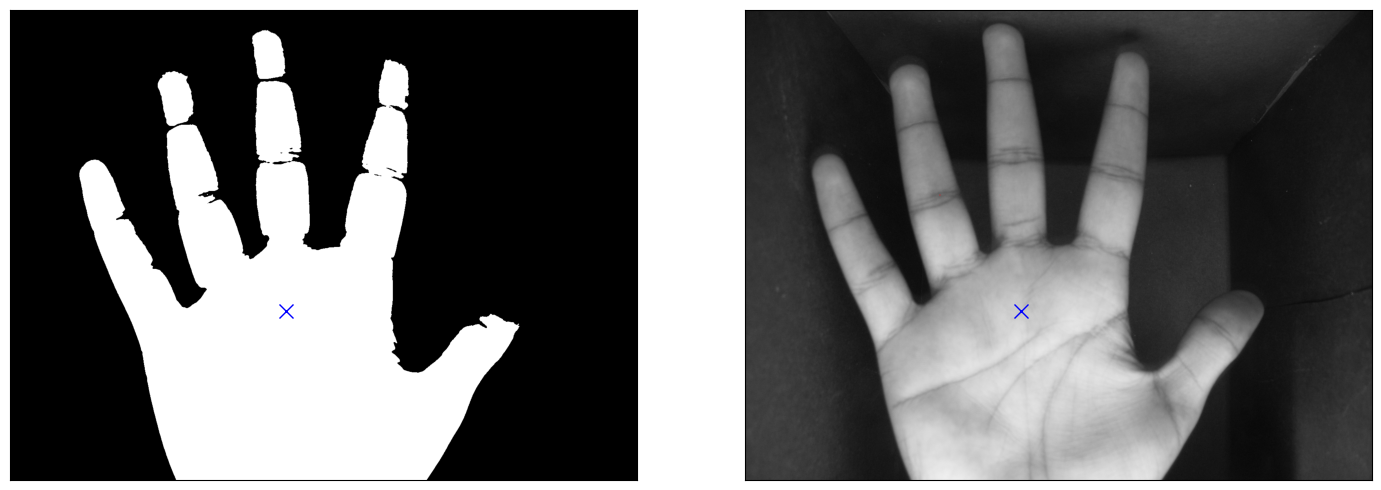

In [270]:
M = cv2.moments(th)
h, w = img.shape
x_c = M['m10'] // M['m00']
y_c = M['m01'] // M['m00']
plt.figure(figsize=(15,5))
plt.subplot(121)
show(th)
plt.plot(x_c, y_c, 'bx', markersize=10)
kernel = np.array([[0, 1, 0],
                   [1, 1, 1],
                   [0, 1, 0]]).astype(np.uint8)
erosion = cv2.erode(th,kernel,iterations=1)
boundary = th - erosion

cnt, _ = cv2.findContours(boundary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
img_c = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cnt = cnt[0]
img_cnt = cv2.drawContours(img_c, [cnt], 0, (255,0,0), 2)
plt.subplot(122)
plt.plot(x_c, y_c, 'bx', markersize=10)
show(img_cnt)
plt.tight_layout()
plt.show()

cnt = cnt.reshape(-1,2)
left_id = np.argmin(cnt.sum(-1))
cnt = np.concatenate([cnt[left_id:,:], cnt[:left_id,:]])

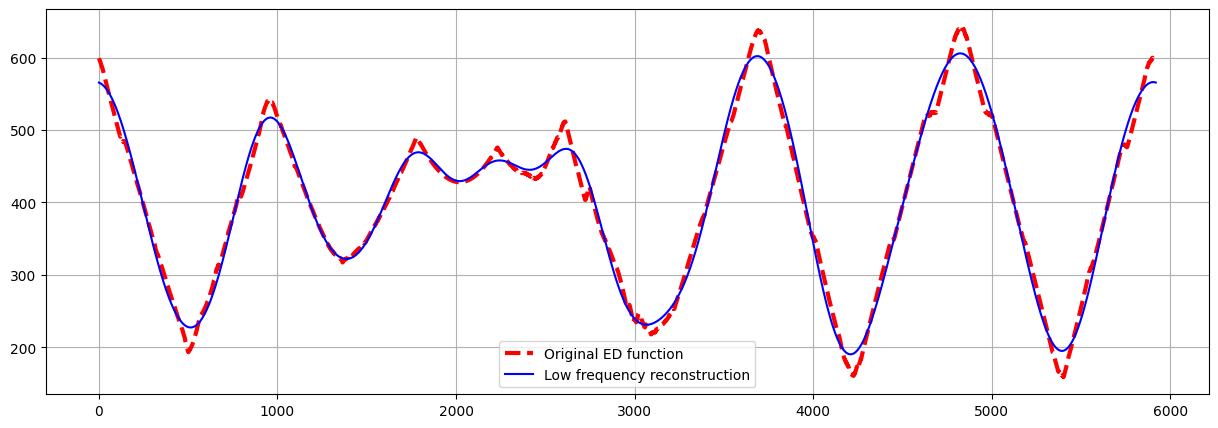

In [229]:
dist_c = np.sqrt(np.square(cnt-[x_c, y_c]).sum(-1))
f = np.fft.rfft(dist_c)
cutoff = 15
f_new = np.concatenate([f[:cutoff],0*f[cutoff:]])
dist_c_1 = np.fft.irfft(f_new)
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(dist_c, label='Original ED function', color='r', linewidth='3', linestyle='--')
plt.plot(dist_c_1, label='Low frequency reconstruction', color='b', linestyle='-')
plt.legend()
plt.show()

In [230]:
eta = np.square(np.abs(f_new)).sum()/np.square(np.abs(f)).sum()
print('Power Retained: {:.4f}{}'.format(eta*100,'%'))

Power Retained: 99.9440%


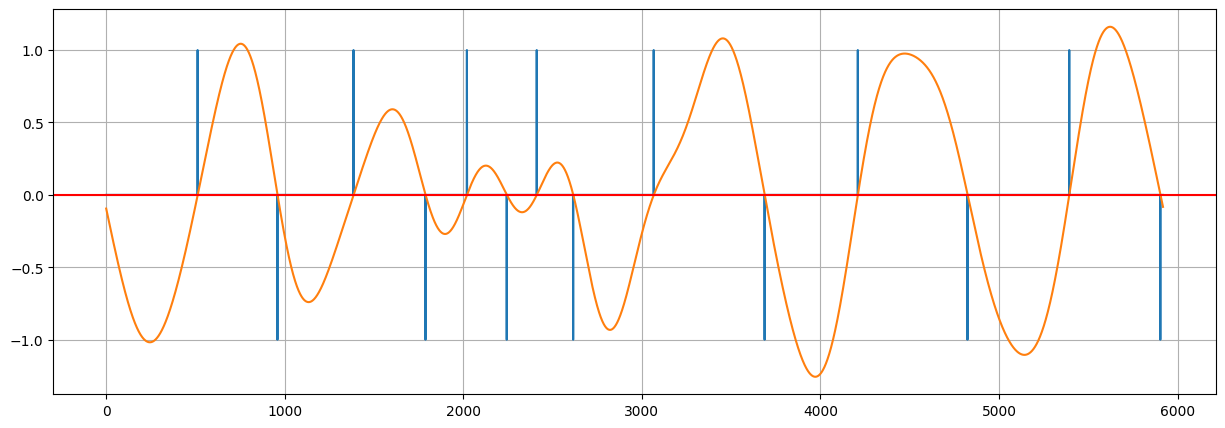

In [231]:
derivative = np.diff(dist_c_1)
sign_change = np.diff(np.sign(derivative))/2
plt.figure(figsize=(15,5))
plt.plot(sign_change)
plt.plot(derivative)
plt.axhline(y=0, color='r')
plt.grid()
plt.show()

The rotation of ROI is 166.83°


TypeError: Can't parse 'center'. Sequence item with index 0 has a wrong type

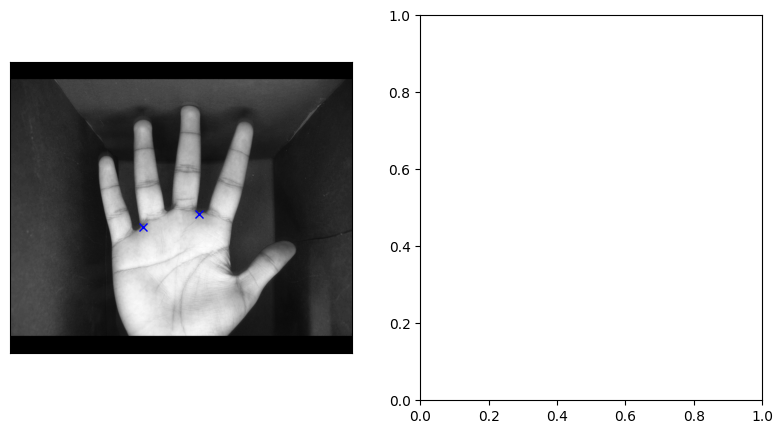

In [232]:
minimas = cnt[np.where(sign_change>0)[0]]
v1, v2 = minimas[5], minimas[0]
plt.figure(figsize=(15,5))
plt.subplot(131)
show(img)
# for v in minimas:
#     plt.plot(v[0], v[1],'rx')
plt.plot(v1[0], v1[1],'bx')
plt.plot(v2[0], v2[1],'bx')

plt.subplot(132)
theta = np.arctan2((v2-v1)[1], (v2-v1)[0])*180/np.pi
print('The rotation of ROI is {:.02f}\u00b0'.format(theta))
R = cv2.getRotationMatrix2D(tuple(v2),theta,1)
img_r = cv2.warpAffine(img,R,(w,h))
v1 = (R[:,:2] @ v1 + R[:,-1]).astype(np.int)
v2 = (R[:,:2] @ v2 + R[:,-1]).astype(np.int)
plt.plot(v1[0], v1[1],'rx')
plt.plot(v2[0], v2[1],'bx')
show(img_r)

ux = v1[0]
uy = v1[1] + (v2-v1)[0]//3
lx = v2[0]
ly = v2[1] + 4*(v2-v1)[0]//3
img_c = cv2.cvtColor(img_r, cv2.COLOR_GRAY2BGR)
cv2.rectangle(img_c, (lx,ly),(ux,uy),(0,255,0),2)
plt.subplot(133)
show(img_c)

plt.tight_layout()
plt.show()